# SARIMAX

Label - the column we are trying to predict into the future <br>
pd.get_dummies() - used for 1 hot encoding

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/Users/tanojudawattage/1_tanoj/0.00_Cloud_Computing_and_Streaming_Tech/Python_for_Time_Series_Files_JosePortilla/Data/RestaurantVisitors.csv', index_col='date', parse_dates=True)
df.index.freq = 'D'

In [4]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


In [5]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [6]:
# Remove missing values
df1 = df.dropna()

In [7]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [8]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [9]:
# change float to int
cols = ['rest1', 'rest2', 'rest3', 'rest4', 'total']

for col in cols:
    df1[col] = df1[col].astype(int)

In [10]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


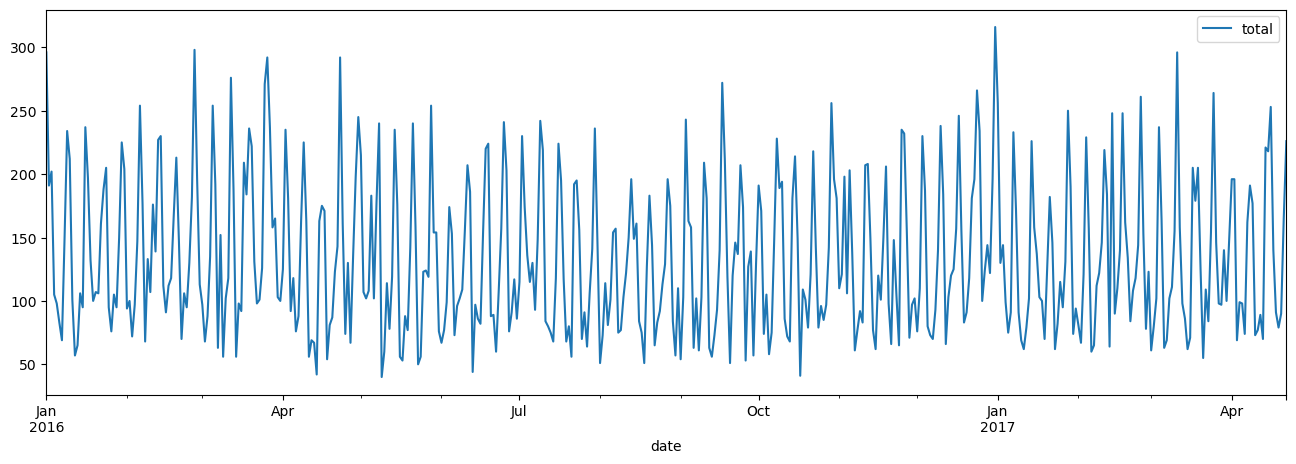

In [11]:
# plot totals
df1['total'].plot(figsize=(16,5), legend=True)
plt.show()

In [12]:
# dates where holiday == 1
df1.query('holiday == 1').index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

In [13]:
# dates where holiday == 1 - alternative method
df1[df1['holiday'] == 1].index

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

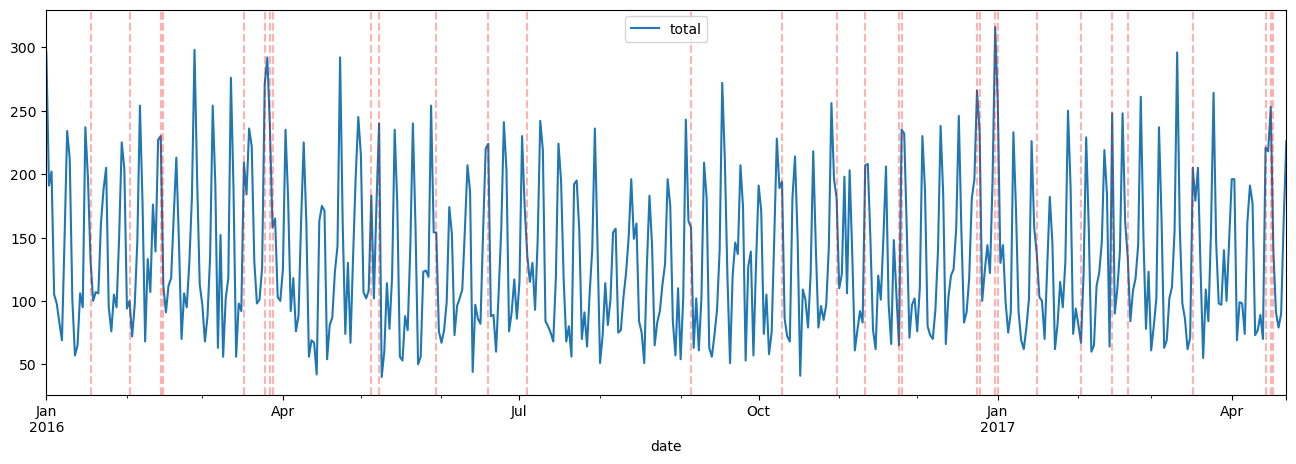

In [14]:
# add in a vertical line for holidays
ax = df1['total'].plot(figsize=(16,5), legend=True)

for day in df1[df1['holiday'] == 1].index:
    ax.axvline(x=day, color='red', linestyle='--', alpha=0.3)
plt.show()

#### ETS decomposition to check for seasonality

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose


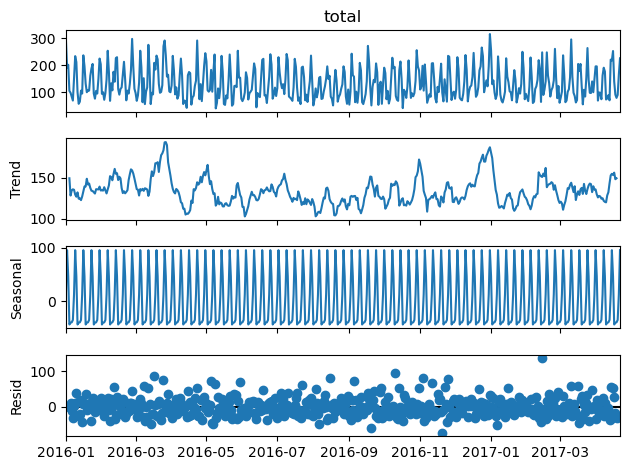

In [16]:
result = seasonal_decompose(df1['total'])
result.plot()
plt.show()

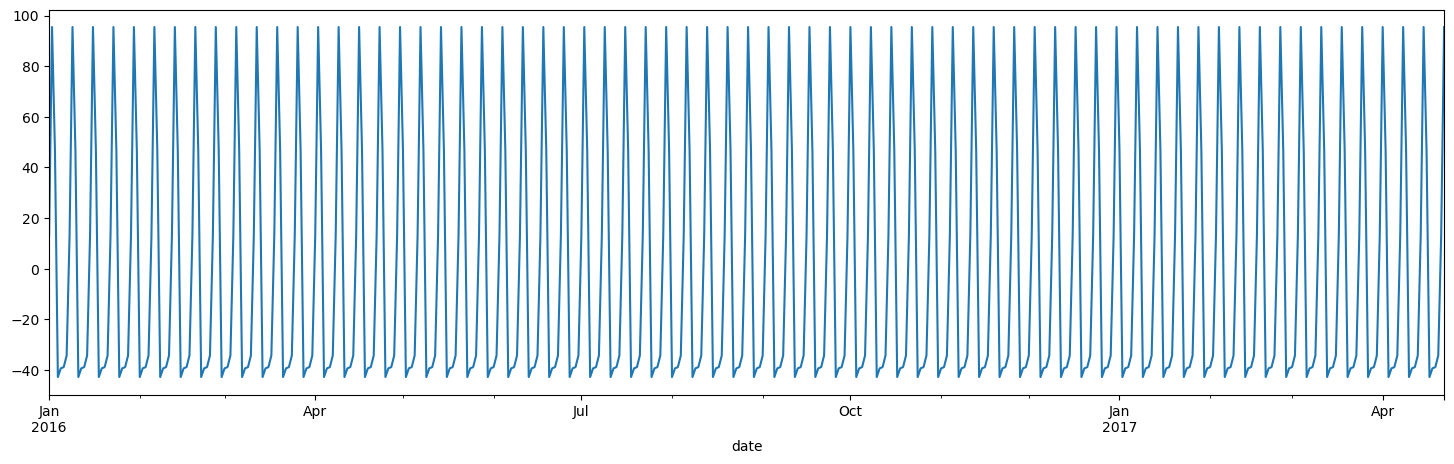

In [17]:
# plot seasonal component only
result.seasonal.plot(figsize=(18,5))
plt.show()

# Fit to a basic SARIMA modle

In [18]:
len(df1)

478

#### Train-Test split

In [19]:
# set 4 weeks for testing
train = df1.iloc[:436]
test = df1.iloc[436:]

#### auto_arima to get the weights

In [20]:
from pmdarima import auto_arima

In [21]:
auto_arima(df1['total'], seasonal=True, m=7, trace=False,).summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2381.871
Date:                   Sun, 07 Dec 2025   AIC                           4771.743
Time:                           18:59:18   BIC                           4788.421
Sample:                       01-01-2016   HQIC                          4778.300
                            - 04-22-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.7546      1.721      2.762      0.006       1.381       8.128
ar.S.L7        0.9658      0.012     78.129      0.000       0.942       0.990
ma.S.L7       -0.7734      0.049    -15.855      0.000      -0.869      -0.678
sigma2      1242.7938     74.289     16.729      0.000    1097.191    1388.397
===================================================================================
Ljung-Box (L1) (Q):                  16.23   Jarque-Bera (JB):                62.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.75
Prob(H) (two-sided):                  0.30   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [23]:
modle = SARIMAX(train['total'], order=(1, 0, 0), seasonal_order=(2, 0, 0, 7), enforce_invertibility=False)

# use enforce_invertibility=False to avoid: ValueError: The computed MA polynomial is not invertible. or ValueError: The computed AR polynomial is not stationary. or ValueError: non-invertible starting MA parameters found


#### Fit the model

In [24]:
results = modle.fit()

In [25]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 7)   Log Likelihood               -2224.701
Date:                           Sun, 07 Dec 2025   AIC                           4457.403
Time:                                   18:59:19   BIC                           4473.713
Sample:                               01-01-2016   HQIC                          4463.840
                                    - 03-11-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2212      0.047      4.711      0.000       0.129       0.313
ar.S.L7        0.5063      0.036     14.187      0.000       0.436       0.576
ar.S.L14       0.4574      0.037     12.379      0.000       0.385       0.530
sigma2      1520.2899     82.277     18.478      0.000    1359.029    1681.550
===================================================================================
Ljung-Box (L1) (Q):                   0.99   Jarque-Bera (JB):                29.23
Prob(Q):                              0.32   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.34
Prob(H) (two-sided):                  0.37   Kurtosis:                         4.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predict into the unknown future

In [26]:
start = len(train)
end = len(train) + len(test) - 1

In [27]:
predictions = results.predict(start, end).rename('SARIMAX Model Predictions')

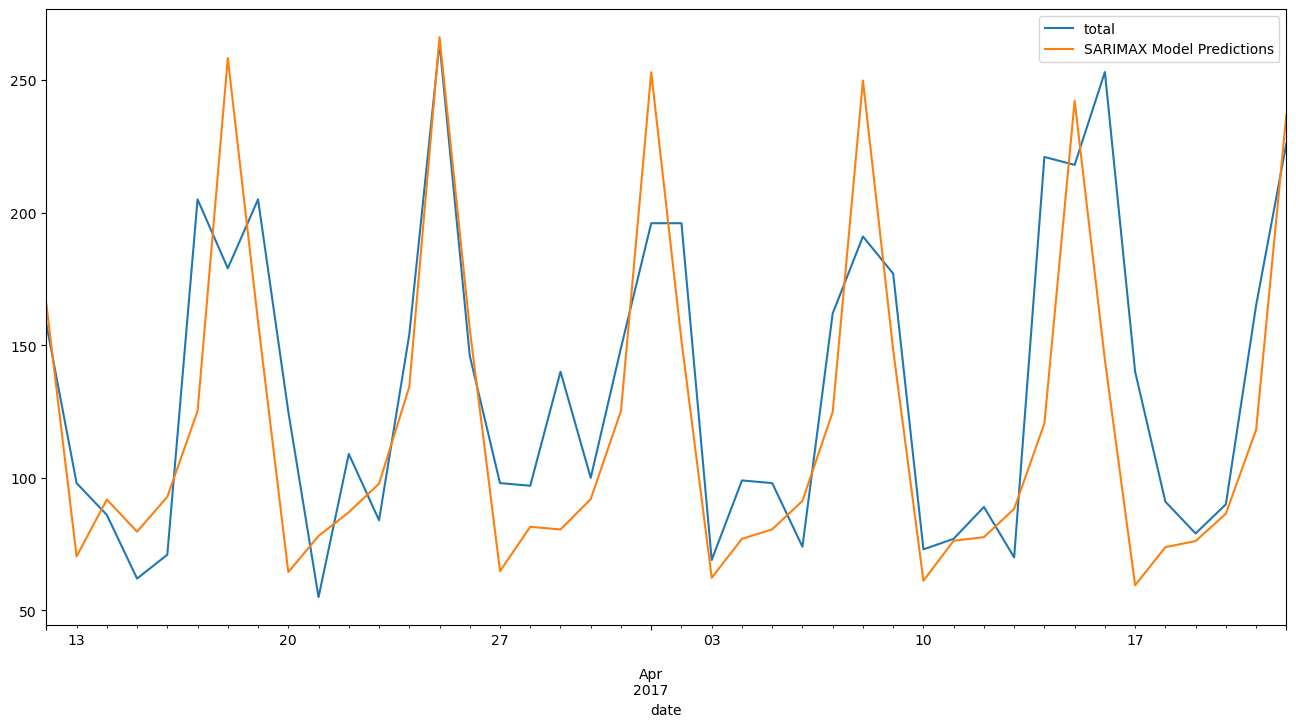

In [29]:
test['total'].plot(figsize=(16,8), legend=True)
predictions.plot(legend=True)
plt.show()

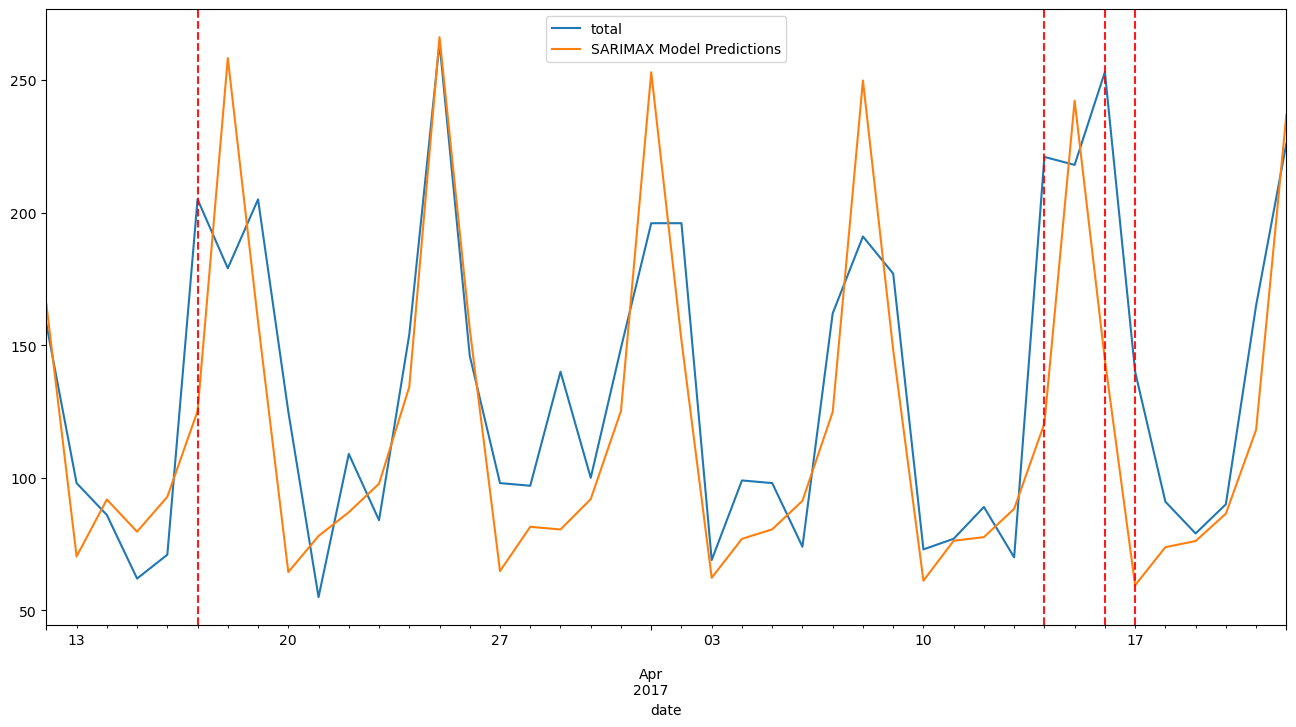

In [32]:
# add in markers to holidays on the prediction plot
ax = test['total'].plot(figsize=(16,8), legend=True)
predictions.plot(legend=True, ax=ax)

for day in df1[df1['holiday'] == 1].index:
    ax.axvline(x=day, color='red', linestyle='--', alpha=0.9)
plt.show()

#### Evaluate the model using RMSE

In [33]:
from statsmodels.tools.eval_measures import rmse

In [34]:
rmse(test['total'], predictions)

np.float64(41.26315491341936)

In [35]:
# compare to the meand of test set
test['total'].mean()

np.float64(134.26190476190476)